In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot as hvp
import datetime
import altair as alt
import seaborn as sns

### DataFrame for Drawdown

In [10]:
# Creating a range of dates
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2023, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')
# Dates df
dates_df = pd.DataFrame(date_range, columns=['Date'])
#print(dates_df.head(1825))

# Creating a range of random "prices"
portfolio_df = pd.DataFrame(
    {
    "fake1": np.random.uniform(1000, -500, 100),
    "fake2": np.random.uniform(1000, -500, 100),
    "fake3": np.random.uniform(1000, -500, 100)
    }
    )
f1_portfolio_df = portfolio_df["fake1"].to_frame()

# Concatinating and finalizing test data
returns = pd.concat([dates_df, portfolio_df], join = "inner", axis = 1)
returns.set_index('Date', inplace = True)
returns = pd.DataFrame(returns)
returns = returns.reset_index().rename(columns={'Date': 'date'})
returns.set_index('date', inplace = True)

### Data Frame for Portfolio Pie Chart

In [11]:
# Creating DataFrame for Bitcoin
btc_portfolio_df = pd.DataFrame({
    'stock': ['BTC:USD'],
    'position_size': np.random.uniform(10, 150, size = 1)
})

# Creating DataFrame for Stocks
stock_portfolio_df = pd.DataFrame({
    'stock': ['AMC', 'VSCO', 'TSLA', 'GOOGL'],
    'position_size': np.random.uniform(1000, 10000, 4)  # for 5 stocks
})

# Combining DataFrames
size_portfolio_df = pd.concat([btc_portfolio_df, stock_portfolio_df], axis = 0).reset_index(drop = True)

# Renaming stock column to securities
size_portfolio_df = size_portfolio_df.rename(columns = {'stock' : 'securities'})

### Portfolio Pie Chart Function

In [4]:
# Defining Portfolio pie chart function
def portfolio_piechart (holdings, size):
    selection = alt.selection_single()
    pie_chart = alt.Chart(size_portfolio_df).mark_arc().encode(
        theta = alt.Theta(field = 'position_size', type = 'quantitative'),
        color = alt.Color(field = 'securities', type = 'nominal'),
        tooltip=['securities', 'position_size']
    )
    return pie_chart

### Portfolio Pie Chart

In [5]:
one = size_portfolio_df['securities']
two = size_portfolio_df['position_size']
user_in_holdings = portfolio_piechart(one, two)
user_in_holdings

c:\Users\Gino\AppData\Local\Programs\Python\Python39\lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [6]:
initial_investment = 10000

In [7]:
def cumulative_returns(df):
    return (1 + df).cumprod()

In [8]:
user_cr = cumulative_returns(portfolio_df)
user_cr

,fake1,fake2,fake3
0,397.22,96.43,965.74
1,63632.67,-15025.60,-207690.10
2,2472355.02,6361141.27,-99221211.97
3,2243878011.38,4429292343.57,-36244795353.06
4,1725350047432.78,560898485281.88,18050758474933.47
...,...,...,...
95,28491515710858010221383357071736135520529474723...,20864239141066284548098726124803400755670767774...,31808583619163694608066815202591482697941562829...
96,41161507490919220497617111873231033989867828668...,19230490401060299373112230233544783339693722164...,-9272664138343251949870914568347074468436354707...
97,19318679759189134094545794607773847920189414799...,11402517743292813455666391345527756403032275335...,-1405938621974242263771001535387259799553987364...
98,16880069310911117989787959779974842796932512399...,11226749701812217723508171083470536978751864427...,-6627437706872876017098929845439896191969003303...


### Correlation

In [9]:
returns_cor = returns.corr()
returns_cor

,fake1,fake2,fake3
fake1,1.00,0.03,-0.02
fake2,0.03,1.00,-0.06
fake3,-0.02,-0.06,1.00


### Correlation Plot Function

In [13]:
#In the works
def correlation_chart(returns):
    returns_cor = returns.corr()
    corr_chart= sns.heatmap(returns_cor, vmin=-1 , vmax = 1)
    return corr_chart


### Correlation Chart

<function __main__.correlation_chart(returns)>

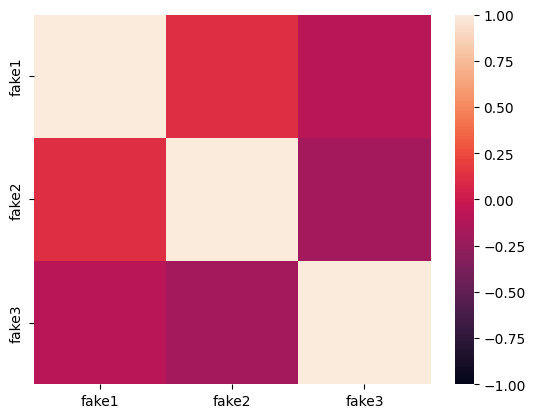

In [14]:
correlation_chart(returns)
correlation_chart

### Covariance

In [12]:
def covariance(df, ticker, market):
    return df[ticker].cov(df[market])

In [13]:
user_covariance = covariance(portfolio_df, 'fake2', 'fake3')
user_covariance

-10738.101867839925

### Variance

In [14]:
def variance(df, market):
    return df[market].var()

In [15]:
user_variance = variance(portfolio_df, 'fake3')
user_variance

186184.34335511425

### Drawdown

In [16]:
def drawdown(df, tickers):
    Roll_Max = df[tickers].cummax()
    Daily_Drawdown = df[tickers]/Roll_Max - 1.0
    Max_Daily_Drawdown = Daily_Drawdown.cummin() * 100

In [17]:
user_drawdown = drawdown(portfolio_df, 'fake1')
user_drawdown

### Drawdown Chart Function

In [18]:
def drawdown_chart(df, date, quant):
    '''
    df: dataframe
    date: str: should be a date column name
    quant: str: should be a quantitative data type
    '''
    chart = alt.Chart(df.reset_index()).mark_bar().encode(
        x = date + ':T',  # T specifies temporal data type for x-axis
        y = quant + ':Q',  # Q specifies a quantitative data type for y-axis
        color = alt.condition(
            getattr(alt.datum, quant) > 0,
            alt.value("Green"),  # The positive color
            alt.value("red")
    ), tooltip= [date + ':T', quant + ':Q']
    ).properties(width=800)
    chart = chart.interactive()
    return chart

In [19]:
user_drawdown = drawdown_chart(returns, 'date', 'fake1')
user_drawdown

alt.Chart(...)

In [20]:
def tracking_error(df, tickers, market):
    track_error = np.sqrt(sum([i**2 for i in df[tickers] - df[market]]))
    return track_error

In [21]:
user_tracking_error = tracking_error(portfolio_df, 'fake2', 'fake3')
user_tracking_error

6233.26767693277

### Beta

In [22]:
def beta(covariance, variance):
    chart_beta = covariance / variance
    chart_beta = chart_beta
    return chart_beta

In [23]:
user_beta = beta(user_covariance, user_variance)
user_beta

-0.057674569592346785

### Beta chart function

In [24]:
# In the works
# def beta_chart(covariance, variance):
#     chart_beta = covariance / variance
#     chart_beta = chart_beta.rolling(window = 21).plot()
#     plt.show()
#     beta.shape
#     chart_beta.plot()
#     return chart_beta

### Sharpe Ratio

In [25]:
def sharpe_ratio(df):
    sharpe = (df.mean()*252) / (df.std() * np.sqrt(252))
    return sharpe

In [26]:
user_sharpe_ratio = sharpe_ratio(portfolio_df)
user_sharpe_ratio

fake1   10.90
fake2    8.29
fake3   10.81
dtype: float64

### Return on Investment

In [27]:
def return_on_investment(investment, returns):
    cumulative_profit = investment * returns
    return_oi = (cumulative_profit - investment) / investment
    return(return_oi)

### Return on Investment

In [28]:
def return_on_investment(investment, returns):
    cumulative_profit = investment * returns
    return_oi = (cumulative_profit - investment) / investment
    return(return_oi)

In [29]:
user_roi = return_on_investment(initial_investment, user_cr)
user_roi

,fake1,fake2,fake3
0,396.22,95.43,964.74
1,63631.67,-15026.60,-207691.10
2,2472354.02,6361140.27,-99221212.97
3,2243878010.38,4429292342.57,-36244795354.06
4,1725350047431.78,560898485280.88,18050758474932.47
...,...,...,...
95,28491515710858010221383357071736135520529474723...,20864239141066284548098726124803400755670767774...,31808583619163694608066815202591482697941562829...
96,41161507490919220497617111873231033989867828668...,19230490401060299373112230233544783339693722164...,-9272664138343251949870914568347074468436354707...
97,19318679759189134094545794607773847920189414799...,11402517743292813455666391345527756403032275335...,-1405938621974242263771001535387259799553987364...
98,16880069310911117989787959779974842796932512399...,11226749701812219169403317942077895416695591636...,-6627437706872876017098929845439896191969003303...


### ROI Chart

In [30]:
# In the works
# source = data.wheat()

# bar = alt.Chart(source).mark_bar().encode(
#     x = df + ':O',
#     y = returns + ':Q'
# )

# <!-- line = alt.Chart(source).mark_line(color='red').transform_window(
#     # The field to average
#     rolling_mean='mean(wheat)',
#     # The number of values before and after the current value to include.
#     frame=[-9, 0]
# ).encode(
#     x='year:O',
#     y='rolling_mean:Q'
# )

# (bar + line).properties(width=600) -->